# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


For easy to understand how this data set was built, I get an example image, which contains number 7, from mist.
1. Resize it from 28x28 to 10X10 and make diagram. Each pixel in image contains value from 0 to 255. The greater the number, the whiter the color. That is the way how people encode the image. [Link](https://www.scan2cad.com/tips/bitmap-vs-vector/) for further information.
2. Because each observation should be one line in dataset so we reshape 2-D array to 1-D array. Using 1-D array as feature vector and label it. In our case, it's 7.
3. Do it again with the other images from mist. We will have a table with feature vector and label. Take a close look at first and third observation. The pattern of them are much similar than second observation. Base on this thing, we hope that can build a model that classify a number using feature vector.

Let's do it.
![Imgur](https://i.imgur.com/wtFCKS3.jpg)

## TODO
1. Read dataset
    - Dataset is too large (42000 observation) for some computer. To make it easy to handle, we get 5000 sample from origin dataset
    - Split data set into train and test set
2. Visualization
    - Visualization helps you understand more about data set. Grab an observation and visualize it.
3. Modeling
    - We try with 2 tree base model:
        - Decision Tree
        - Random Forest
4. Evaluate model
    - Calculate accuracy, precision, recall, f1 score with each model.
    - Random Forest vs Decision Tree, which one is better.
5. Fine Tune
    - Random Forest has many hyper parameters that we have to choose, so which combination is bet fit with our data set? Using gridsearchCV to find it.

## 1. Read dataset

In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report

In [144]:
# Import dataset
# Your code here
data = pd.read_csv(r"C:\Users\ASUS\Downloads\CSML_W4\CSML_W4\data\train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [97]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
data = data.sample(5000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 3124 to 9767
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [20]:
# Let's take a look at first 5 rows ()
# Your code here
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30739,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36814,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16568,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15001,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
737,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```
![image](https://i.imgur.com/lFxwGOf.png=500x500)

In [21]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
data['label'].unique()

array([3, 6, 1, 5, 0, 7, 4, 8, 2, 9], dtype=int64)

In [91]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
X = data['label']
y = data.drop(['label'],axis=1)
X.shape

(5000,)

In [61]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
data["label"].value_counts() / len(data)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

In [145]:
train_set , test_set = train_test_split(data , test_size=0.2, random_state=102, stratify=data['label'])

In [146]:
y_train = train_set['label']
X_train = train_set.drop(['label'],axis=1)

In [100]:
train_set["label"].value_counts() / len(train_set)

1    0.10900
9    0.10150
4    0.10150
0    0.10125
8    0.10000
7    0.09950
3    0.09950
6    0.09900
2    0.09750
5    0.09125
Name: label, dtype: float64

In [147]:
y_test = test_set['label']
X_test = test_set.drop(['label'],axis=1)

In [102]:
test_set["label"].value_counts() / len(test_set)

1    0.109
9    0.102
4    0.102
0    0.102
8    0.100
7    0.099
6    0.099
3    0.099
2    0.097
5    0.091
Name: label, dtype: float64

## 2. Visualization

In [30]:
y_train.head(3)

37249    4
18836    4
25295    5
Name: label, dtype: int64

In [ ]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
# index = 21261
# print("Label: " + str(y_train[index]))
# plt.imshow(X_train.loc[index].as_matrix().reshape((28,28)),cmap='gray')
# plt.axis('off')
# plt.show()

## 3. Modeling

In [149]:
y_train.shape

(33600,)

In [150]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
rfc = RandomForestClassifier(max_depth = 21, n_estimators = 258)
# dtc = DecisionTreeClassifier()

In [151]:
# Let's fit training data to Random Forest Classifier
# Your code here
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=21, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=258,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Let's fit training data to Decision Tree Classifier
# Your code here
# dtc.fit(X_train,y_train)

## 4. Evaluate model

In [152]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
rfc_y_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_y_pred)

0.9677380952380953

In [ ]:
# Decision Tree model
# Your code here
# dtc_y_pred = dtc.predict(X_test)
# accuracy_score(y_test, dtc_y_pred)

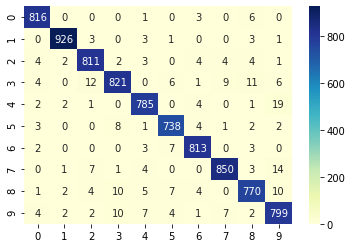

In [163]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
rfc_cm = confusion_matrix(y_test, rfc_y_pred)
sns.heatmap(rfc_cm,cmap="YlGnBu", annot=True, fmt="d")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da

In [154]:
report = classification_report(y_test, rfc_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       826
           1       0.99      0.99      0.99       937
           2       0.97      0.97      0.97       835
           3       0.96      0.94      0.95       870
           4       0.97      0.96      0.97       814
           5       0.97      0.97      0.97       759
           6       0.97      0.98      0.98       828
           7       0.98      0.97      0.97       880
           8       0.96      0.95      0.95       813
           9       0.94      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [ ]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here
dtc_cm = confusion_matrix(y_test, dtc_y_pred)
sns.heatmap(dtc_cm,cmap="YlGnBu", annot=True, fmt="d")

## 5. Fine Tune
[Further reading](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [ ]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(predictions,y_test))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(x=n,y=result)
print(result)

In [103]:
X_train.shape

(4000, 784)

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=300),
        'max_depth': randint(low=1, high=30)
}

rfc = RandomForestClassifier()
rnd_search = RandomizedSearchCV(rfc, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [110]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9492101980067429 {'max_depth': 7, 'n_estimators': 271}
0.9617692030835673 {'max_depth': 11, 'n_estimators': 72}
0.9521029356114811 {'max_depth': 29, 'n_estimators': 21}
0.9503946548671242 {'max_depth': 7, 'n_estimators': 122}
0.96591925128346 {'max_depth': 19, 'n_estimators': 215}
0.9618991631143049 {'max_depth': 11, 'n_estimators': 88}
0.9625487000666513 {'max_depth': 21, 'n_estimators': 100}
0.9569482744641948 {'max_depth': 8, 'n_estimators': 152}
0.8699137888319739 {'max_depth': 3, 'n_estimators': 150}
0.9663074045043845 {'max_depth': 21, 'n_estimators': 258}


# Cross validation

## Great job!

# save file

In [153]:
import joblib

joblib.dump(rfc, "Dinh_model.pkl")
# and later...
my_model_loaded = joblib.load("Dinh_model.pkl")